In [1]:
import pandas as pd
import numpy as np
# !pip install umap-learn
import umap.umap_ as umap

from matplotlib import pyplot as plt

### Dataset analysis

In [2]:
met_df = (pd.read_csv("./metabolomics/data_zscore_comp_id.csv"))

In [3]:
met_df.head()

,Unnamed: 0,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
0,42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
2,27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
3,38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
4,437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
met_df.shape

(968, 464)

In [5]:
met_df['Unnamed: 0'].unique().shape # unnamed -> unique values, id?

(968,)

In [6]:
comp_df = pd.read_csv("./metabolomics/compAnno.csv")

In [7]:
comp_df.head()

,BIOCHEMICAL,PATHWAY_SORTORDER,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,CHEMICAL_ID,PUBCHEM,CAS,KEGG,HMDB_ID
0,S-1-pyrroline-5-carboxylate,64.0,Amino Acid,Glutamate Metabolism,42370,Pos Early,35,11966181,2906-39-0,C04322,HMDB0001301
1,spermidine,553.0,Amino Acid,Polyamine Metabolism,485,Pos Early,50,1102,124-20-9,C00315,HMDB0001257
2,1-methylnicotinamide,4336.0,Cofactors and Vitamins,Nicotinate and Nicotinamide Metabolism,27665,Pos Early,55,457,1005-24-9,C02918,HMDB0000699
3,"12,13-DiHOME",2048.0,Lipid,"Fatty Acid, Dihydroxy",38395,Neg,62,10236635,263399-35-5,C14829,HMDB0004705
4,5-hydroxyindoleacetate,295.0,Amino Acid,Tryptophan Metabolism,437,Neg,71,1826,54-16-0,C05635,HMDB0000763


comp_df.shape

In [8]:
comp_df['COMP_ID'].unique().shape

(963,)

In [9]:
met_df['Unnamed: 0'].unique().shape

(968,)

In [10]:
# missing ids?
missing_ids = [x for x in list(met_df['Unnamed: 0']) if x not in list(comp_df['COMP_ID'])]
missing_ids

[33967, 38595, 53189, 52896, 52897]

In [11]:
for x in missing_ids:
    print(x, met_df[met_df['Unnamed: 0'] == x].isna().sum(axis=1))

33967 963    463
dtype: int64
38595 964    463
dtype: int64
53189 965    463
dtype: int64
52896 966    463
dtype: int64
52897 967    463
dtype: int64


In [12]:
# rows with all NaN
len([x for x in met_df.isna().sum(axis=1) if x == 463])

8

In [13]:
met_df.set_index('Unnamed: 0', inplace=True)
met_df.index.name = None
met_df.head()

,BAYL-08997,BAYL-08998,BAYL-08999,BAYL-09000,BAYL-09001,BAYL-09002,BAYL-09003,BAYL-09004,BAYL-09005,BAYL-09006,...,s_21944,s_22832,s_22842,s_22997,s_23003,s_23077,s_23123,s_22787,s_23294,s_73385
42370,-1.259948,0.170557,0.814204,0.038958,-0.504466,-0.757901,-0.986865,0.993000,0.986541,0.000250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,-0.610334,-0.811169,-0.554787,-0.603603,-0.549375,-0.631363,0.606882,1.238204,1.661840,-0.931552,...,-0.434904,-0.730548,-0.009508,-0.607362,0.219333,-0.767359,-0.421440,0.085019,-0.732586,-1.167603
27665,-1.201809,0.387317,-1.062940,0.525122,-0.973446,-0.253533,0.195547,0.769406,0.796718,-0.058625,...,0.825309,2.224161,0.182297,-0.697035,0.161942,-0.266286,0.775185,-0.640354,1.440073,0.458074
38395,-0.954275,-0.906589,4.929942,0.974496,-0.740805,0.642705,-0.293678,0.650630,1.008092,-0.778676,...,-1.505053,-1.112171,0.062801,-0.778621,0.574785,-0.251823,-0.822022,-1.332230,0.767016,-1.741468
437,0.240999,-0.454249,-0.000406,-0.542391,NaN,0.403722,-0.492163,0.252810,-0.517825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# drop rows with all NaN values
met_df.dropna(axis=0, how='all', inplace=True)

In [15]:
met_df.shape

(960, 463)

In [16]:
# drop rows containing more than 80% NaN values
perc = 0.8
min_count =  int((1 - perc)*met_df.shape[1] + 1)
met_df.dropna(axis=0, thresh=min_count, inplace=True)

In [17]:
met_df.shape

(948, 463)

In [18]:
# fill missing z-scores
met_df.fillna(0, inplace=True)

In [19]:
# features: metabolomics z-scores
# samples: patients
met_df = met_df.T

In [20]:
met_df.shape

(463, 948)

In [21]:
met_df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.259948,-0.610334,-1.201809,-0.954275,0.240999,-0.485987,0.598959,-0.286401,-1.043185,-0.660514,...,-1.094129,-0.419479,0.158619,-0.817640,1.120043,0.045789,0.201601,-0.039255,2.783415,-0.127840
BAYL-08998,0.170557,-0.811169,0.387317,-0.906589,-0.454249,-0.409053,0.612680,-0.315412,-1.095163,0.001887,...,-1.116107,0.000000,-0.424652,0.987125,-0.045571,0.295498,0.409790,-0.195962,1.987574,-0.160196
BAYL-08999,0.814204,-0.554787,-1.062940,4.929942,-0.000406,0.022588,3.050217,2.366699,1.132455,-0.142467,...,0.391963,0.284916,0.020418,-0.129573,-0.090421,0.118741,1.112410,-0.048789,1.794673,-0.226005
BAYL-09000,0.038958,-0.603603,0.525122,0.974496,-0.542391,-0.494779,-0.347355,-0.392808,-0.713237,-0.359097,...,-0.119144,-0.807474,1.317694,0.175748,1.241565,0.113926,-0.978284,-0.653111,0.000000,-0.063945
BAYL-09001,-0.504466,-0.549375,-0.973446,-0.740805,0.000000,-0.049422,-0.787278,-0.598359,-0.781751,-0.515097,...,-0.351091,0.000000,-0.405493,0.000000,0.297091,-0.581249,0.637026,-0.778015,0.829880,-0.017687


In [22]:
clin_df = pd.read_csv("./metabolomics/sampleAttr.csv")

In [23]:
clin_df.head()

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,ga.w,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height
0,BAYL-08997,0,batch_2023,45.1,7,0,Chinese,55.3,1.0,True,S1_1_Ca,36.64887063655031,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.444444,1,150
1,BAYL-08998,0,batch_2023,82.2,7,0,Chinese,63.1,1.0,True,S1_2_Ca,32.309377138945926,2,NaN,batch-2023,ASA - 1st Trimester,CHUK,94.267516,1,171
2,BAYL-08999,0,batch_2023,69.6,7,0,Chinese,58.8,0.0,True,S1_1_Co,43.90143737166324,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,99.367089,1,161
3,BAYL-09000,0,batch_2023,51.4,7,0,Chinese,62.9,0.0,True,S1_2_Co,33.11430527036276,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,98.684211,1,154
4,BAYL-09001,0,batch_2023,39.2,7,0,Chinese,45.3,0.0,True,S1_4_Co,24.32032854209445,7,NaN,batch-2023,ASA - 1st Trimester,CHUK,95.597484,1,161


In [24]:
clin_df.shape

(463, 20)

In [25]:
clin_df.isna().sum()

sIDs              0
sle               0
BErm              0
weight            0
conception        0
smoking           0
race              0
crl               0
pe                0
ASA               0
ptIDs             0
age               0
prev.pe           0
ga.w            463
consss_batch      0
ASA_tri_chr       0
STUDY             0
Compliance        0
trimester         0
height            0
dtype: int64

In [26]:
# ga.w -> all NaN
clin_df.drop(['ga.w'], axis=1, inplace=True)

In [27]:
clin_df.shape

(463, 19)

### batch effect correction

In [28]:
batches = list(clin_df["STUDY"].unique())
batches_dict = {k:v for v, k in enumerate(batches)}
batches_dict

{'CHUK': 0, 'ASPRE_LR': 1, 'ASPRE_HR': 2, 'from-2015': 3}

In [29]:
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(met_df)

In [30]:
# !pip install seaborn
import seaborn as sns

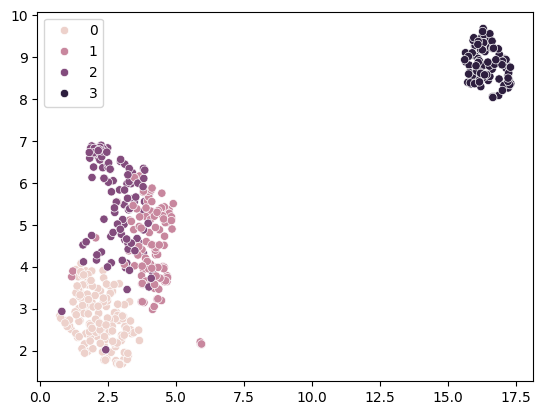

In [31]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [32]:
# !pip install combat
from combat.pycombat import pycombat

In [33]:
met_df_corrected = pycombat(met_df.T, clin_df['STUDY'].values).T

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/home/lucija/.local/lib/python3.10/site-packages/combat/pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


In [34]:
umap_result_corrected = umap_model.fit_transform(met_df_corrected)

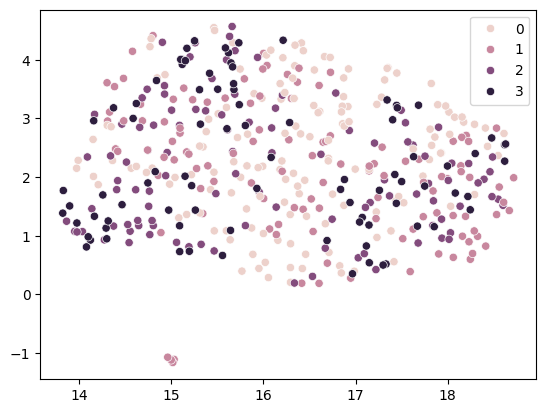

In [35]:
sns.scatterplot(x=umap_result_corrected[:, 0], y=umap_result_corrected[:, 1], hue=clin_df['STUDY'].apply(lambda x: batches_dict[x]).values)
plt.show()

In [36]:
# TODO: analyse outliers

In [37]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [38]:
outliers = find_outliers_IQR(pd.DataFrame(umap_result_corrected)).dropna(how='all')
outliers

,0,1


In [39]:
outliers = outliers.index

In [40]:
[x[0] for i, x in enumerate(umap_result_corrected) if i in outliers]

[]

In [41]:
[x[1] for i, x in enumerate(umap_result_corrected) if i in outliers]

[]

In [42]:
met_df_corrected.iloc[outliers]

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754


In [43]:
clin_df.iloc[outliers]

,sIDs,sle,BErm,weight,conception,smoking,race,crl,pe,ASA,ptIDs,age,prev.pe,consss_batch,ASA_tri_chr,STUDY,Compliance,trimester,height


In [44]:
# FIX: uporediti vrednosti sa ostalim vrednostima...

In [45]:
# [int(x) for x in clin_df['age']]
# invalid literal for int() with base 10: '36.64887063655031'

# [float(x) for x in clin_df['age']]
# could not convert string to float: '30,3'

clin_df['age'] = [float(x.replace(',', '.')) for x in clin_df['age']]

In [46]:
clin_df['age'].mean()

32.02567562972786

In [47]:
stats = met_df_corrected.drop(met_df_corrected.iloc[outliers].index, axis=0).describe()

In [48]:
(met_df_corrected.iloc[outliers] - stats.loc['mean']).T.max()

Series([], dtype: float64)

In [49]:
(met_df_corrected.iloc[outliers] - stats.loc['mean']).T.idxmax()

/tmp/ipykernel_4685/1844766302.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  (met_df_corrected.iloc[outliers] - stats.loc['mean']).T.idxmax()


Series([], dtype: float64)

In [50]:
stats.loc['max'][19324]

8.249072382388261

In [51]:
stats.loc['mean'][19324]

0.22575792876032674

In [52]:
# drop outliers
met_df_corrected.drop(met_df_corrected.iloc[outliers].index, axis=0, inplace=True)

#### selecting patients who do not take aspirin

In [53]:
met_df_corrected.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.964491,-0.431870,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.989288,-0.052062,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,0.712233,0.205910,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.135561,-0.783174,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.126139,-0.052062,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903


In [54]:
met_df_corrected.index

Index(['BAYL-08997', 'BAYL-08998', 'BAYL-08999', 'BAYL-09000', 'BAYL-09001',
       'BAYL-09002', 'BAYL-09003', 'BAYL-09004', 'BAYL-09005', 'BAYL-09006',
       ...
       's_21944', 's_22832', 's_22842', 's_22997', 's_23003', 's_23077',
       's_23123', 's_22787', 's_23294', 's_73385'],
      dtype='object', length=463)

In [55]:
# pe: preeclampsia (1/0)
# ASA: aspirin (True/False)
target = clin_df[['pe', 'ASA']]
target.index = met_df.index
target

,pe,ASA
BAYL-08997,1.0,True
BAYL-08998,1.0,True
BAYL-08999,0.0,True
BAYL-09000,0.0,True
BAYL-09001,0.0,True
...,...,...
s_23077,0.0,False
s_23123,0.0,False
s_22787,0.0,False
s_23294,0.0,False


In [56]:
df = met_df_corrected.join(target)

In [57]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53267,54840,57714,57716,57718,57719,57720,57754,pe,ASA
BAYL-08997,-1.146044,-0.963613,-0.919117,-0.762660,0.465701,-0.320001,0.233840,-0.532667,-1.168056,-0.883133,...,-0.018127,-0.782722,0.726292,-0.162880,0.073752,0.280983,2.018124,-0.304346,1.0,True
BAYL-08998,0.477460,-1.334107,0.560994,-0.731371,-0.380466,-0.160025,0.244165,-0.555093,-1.230067,0.303362,...,-0.493536,1.048180,-0.247548,0.127745,0.257907,0.127953,1.356468,-0.354117,1.0,True
BAYL-08999,1.207946,-0.861143,-0.789775,3.098316,0.171894,0.737533,2.078369,1.518216,1.427540,0.044795,...,-0.130771,-0.084690,-0.285019,-0.077975,0.879417,0.271672,1.196092,-0.455349,0.0,True
BAYL-09000,0.328107,-0.951196,0.689346,0.502918,-0.487740,-0.338284,-0.478244,-0.614922,-0.774419,-0.343233,...,0.926604,0.225052,0.827820,-0.083578,-0.969927,-0.318468,-0.295987,-0.206059,0.0,True
BAYL-09001,-0.288635,-0.851158,-0.706419,-0.622590,0.172388,0.587794,-0.809278,-0.773815,-0.856158,-0.622660,...,-0.477920,0.046759,0.038737,-0.892661,0.458911,-0.440441,0.393969,-0.134903,0.0,True


In [58]:
df = df[df['ASA'] == False].copy(deep=True)

In [59]:
df.shape

(312, 950)

In [60]:
df.drop(['ASA'], axis = 1, inplace=True)

In [61]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53266,53267,54840,57714,57716,57718,57719,57720,57754,pe
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.106908,-1.411424,0.30259,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809,0.0
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.106908,-0.639404,0.05089,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516,0.0
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,-0.106908,-0.399493,0.05089,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825,0.0
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,-0.106908,-0.905314,0.05089,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870,0.0
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.403598,-0.138321,0.05089,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875,0.0


In [62]:
target = df['pe']
df.drop(['pe'], axis=1, inplace=True)
target

BAYL-09014    0.0
BAYL-09015    0.0
BAYL-09016    0.0
BAYL-09017    0.0
BAYL-09018    0.0
             ... 
s_23077       0.0
s_23123       0.0
s_22787       0.0
s_23294       0.0
s_73385       1.0
Name: pe, Length: 312, dtype: float64

In [63]:
np.bincount(target)

array([215,  97])

In [64]:
df.head()

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.30259,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.166551,-0.106908,-0.639404,0.05089,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.05089,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.05089,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.05089,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875


In [65]:
df

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
BAYL-09014,0.187195,-0.411608,-0.201654,-0.086973,-0.309109,-0.203433,-0.713625,-0.778418,-1.113101,-0.866871,...,-0.143234,-0.106908,-1.411424,0.302590,-0.360792,-0.172929,-0.611234,-0.480311,-0.812788,-0.482809
BAYL-09015,0.116498,0.383105,-0.360268,-0.463560,6.005495,4.367434,-1.694316,-0.689994,-0.512699,-0.901225,...,-0.166551,-0.106908,-0.639404,0.050890,-0.294085,0.396847,-0.657205,-0.432585,0.152489,-0.483516
BAYL-09016,0.328494,-0.351793,0.032687,0.278353,-0.466042,0.347924,-0.919203,-0.611164,-0.401548,-0.738094,...,0.077473,-0.106908,-0.399493,0.050890,-0.130459,0.353794,-0.724256,0.272478,0.152489,0.023825
BAYL-09017,0.372754,0.223826,-0.084264,0.468975,-0.299095,0.116690,0.917165,-0.641642,-0.458021,-0.464570,...,1.807032,-0.106908,-0.905314,0.050890,-0.527920,0.345362,0.399237,0.137705,0.152489,-0.399870
BAYL-09018,0.103126,0.523683,-0.238103,-1.071461,-0.336122,0.168030,0.032885,0.054229,0.430654,-0.579905,...,-0.358738,-0.403598,-0.138321,0.050890,-0.435343,1.017162,1.103591,0.000695,0.152489,-0.308875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_23077,-0.052360,-0.645759,-0.928460,0.322687,-0.011331,-0.009173,-1.298761,-0.056718,-0.104810,-0.513336,...,-0.736803,-0.663873,-0.115364,0.032251,-0.928072,-0.391278,2.037867,-0.016027,1.079962,-0.623414
s_23123,-0.052360,-0.166949,0.115088,-0.439904,-0.011331,-0.332268,-0.551854,0.175810,-0.489038,-0.477625,...,-0.610517,-0.854820,-0.115364,0.032251,-2.891681,-0.114168,1.405134,-0.016027,1.153829,-0.559394
s_22787,-0.052360,0.534076,-1.303274,-1.122262,-0.011331,0.466516,-1.077055,-0.012729,1.205847,-0.321399,...,-0.012596,-0.725384,-0.115364,0.032251,0.505416,1.012587,-1.602580,-0.016027,-1.581236,-0.520321
s_23294,-0.052360,-0.597626,0.781302,1.685294,-0.011331,-0.980053,-0.276637,0.632209,-0.021027,-0.833430,...,-1.089903,0.229379,-0.115364,0.032251,-0.049360,-0.354491,-0.570818,-0.016027,-0.574198,-0.587279


### Feature selection

In [66]:
# iteritems is deprecated, downgrade pandas....
# !pip install pandas==1.5.3 
from pymrmre import mrmr

In [253]:
# implementing custom scikit-learn compatible estimator for mrmr (wrapper class)
from sklearn.base import BaseEstimator

In [254]:
class MRMR(BaseEstimator):
    def __init__(self, solution_length=1):
        self.solution_length = solution_length
        self.solution = []
        
    def fit(self, X_train, y_train):
        self.solution = mrmr.mrmr_ensemble(features=X_train, targets=pd.DataFrame(y_train), solution_length=self.solution_length, solution_count=1).iloc[0][0]
        return self
        
    def transform(self, X_train):
        return X_train[self.solution]
        

In [252]:
# old solution:
# solutions = mrmr.mrmr_ensemble(features=df, targets=pd.DataFrame(target), solution_length=30, solution_count=10)
# df[solutions.iloc[0][0]]

In [242]:
mrmr_custom = MRMR(solution_length=30)

In [243]:
mrmr_custom.fit(df, target)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

MRMR(solution_length=30)

In [245]:
df_mrmr_transformed = mrmr_custom.transform(df)

In [249]:
df_mrmr_transformed.head()

,40708,53254,57591,1769,62059,52473,52608,54946,37184,43829,...,52700,36098,2761,52465,45095,35253,15500,48841,44664,42459
BAYL-09014,0.368198,0.133451,-0.649723,-0.184244,-1.445462,-0.503781,0.006980,-0.120488,-0.377999,-0.456275,...,-0.937716,-0.838689,-0.223382,0.497289,-1.069378,-0.323056,-1.015329,0.495261,-0.368787,-0.016768
BAYL-09015,0.299528,0.133451,-1.169474,-0.163673,-1.434013,-0.029211,1.398055,0.112354,0.938145,-0.049665,...,-0.961670,-0.722164,-0.289053,0.273544,-1.170107,-0.978957,-0.851212,0.906437,-1.108009,0.557945
BAYL-09016,0.642681,0.133451,-0.581132,0.577692,-1.097334,0.503939,1.499696,0.006820,1.309655,-0.098987,...,-0.905234,-0.470287,0.548448,1.103592,-0.436413,0.531836,-1.567357,-0.065978,-1.406014,-0.111154
BAYL-09017,0.259352,-0.085648,-0.393785,-0.502690,-0.934958,0.011626,-0.430597,0.161341,0.506806,-0.110579,...,-0.760760,1.528141,-0.990145,0.609766,-0.524003,1.684063,0.858633,1.021583,0.388467,0.456579
BAYL-09018,0.663814,0.146754,-0.620911,-0.072844,-0.935897,-0.141565,1.776304,0.500555,0.506806,0.723307,...,-0.967287,0.281866,-0.066881,1.530963,0.296151,0.119581,0.435751,-0.050670,1.520627,1.095210


### Classification

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

## shape (312, 948)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [171]:
X_train.shape

(249, 948)

In [172]:
X_test.shape

(63, 948)

In [183]:
X_proba = pd.DataFrame(X_train, columns=df.columns)

In [184]:
X_proba

,42370,485,27665,38395,437,528,1417,1549,531,1414,...,53157,53266,53267,54840,57714,57716,57718,57719,57720,57754
0,0.563125,-0.376774,-1.225876,0.027265,-0.455930,0.542144,-0.192691,-0.737417,-0.793295,-0.648234,...,-0.159622,0.198347,-0.195671,0.877064,3.371382,-0.616656,-0.819743,-0.004432,0.213163,-0.070059
1,0.126380,-0.000793,0.043335,-0.368572,-0.011499,0.367916,-0.852146,0.867553,-0.626935,0.557481,...,-0.369855,-1.133220,0.778179,0.010402,-0.794351,-0.588290,0.960781,0.038766,1.181862,-0.016497
2,0.733045,1.249935,1.268149,-0.647919,0.718952,-0.392533,2.195818,-0.496278,0.472873,-0.321157,...,-0.119839,0.198347,1.480463,1.767813,0.371324,-0.374584,2.142425,-0.455528,-0.097106,0.167776
3,0.126380,-1.101183,1.029504,-0.263746,-0.011499,-1.059000,-0.739475,0.183060,-0.891622,0.703471,...,-1.632092,1.392941,-0.099627,0.010402,-0.115317,-1.215147,-0.247235,0.038766,-0.922405,-0.440448
4,0.048538,0.214569,1.203339,-0.892417,0.020944,-0.272847,-0.058083,0.060029,-0.763722,0.215591,...,-0.258649,-0.951449,-0.479297,0.051327,0.216455,1.263972,0.229779,1.425133,0.123706,-0.093146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.912221,0.050104,0.286357,-0.708712,-0.141283,-0.297954,-1.010182,-0.547327,0.042017,0.271959,...,-1.647331,-1.148568,-0.663641,-1.285636,-0.329748,-0.443279,1.113568,0.152744,-1.308476,-0.008341
245,0.896479,-0.031190,0.320353,-0.125017,0.441097,-0.444157,0.800284,1.076145,6.656697,0.323046,...,0.088728,-0.244512,0.251660,0.447949,-0.432569,-0.658912,-1.051130,-0.199762,0.144958,-0.247684
246,-0.504997,-0.143763,-0.996364,3.179452,-0.928047,0.102256,-0.035151,2.323671,0.251796,0.272969,...,-0.678450,0.198347,-0.687208,2.345177,-0.304992,1.662380,-0.790757,0.825512,-0.787411,-0.321271
247,1.359752,-0.419612,-1.240272,1.607056,-0.796743,-0.361337,-0.345578,-0.799244,-0.527724,-0.211778,...,-0.716915,0.299484,0.868090,-0.235507,-0.358022,0.341772,0.332733,-0.320140,2.652465,0.065091


In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=20)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
importances = model.feature_importances_

In [ ]:
importances.max()

In [ ]:
importances.min()

In [ ]:
len([x for x in importances if x == 0])

In [ ]:
bst = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

In [ ]:
bst.fit(X_train, y_train)

In [ ]:
y_pred = bst.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

## shape (312, 100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[solutions.iloc[0][0]], target, stratify=target, test_size=0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=20)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
importances = model.feature_importances_

In [ ]:
importances.max()

In [ ]:
importances.min()

In [ ]:
len([x for x in importances if x == 0])

In [ ]:
bst = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

In [ ]:
bst.fit(X_train, y_train)

In [ ]:
y_pred = bst.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

## Choosing hyperparameters

In [255]:
# FIXED
# GridSearchCV, Pipeline -> mrmr does not implement methods fit and transform

In [ ]:
def GridSearch(data, target, solution_lengths, n_estimators_lst, max_depth_lst):
    
    res = []
    
    for n_estimators in n_estimators_lst:
        for max_depth in max_depth_lst:
            
            solutions_scores = {}
            
            for l in solution_lengths:

                X_train, X_val, y_train, y_val = train_test_split(data, target, stratify=target, test_size=0.2, random_state=7)

                solutions = mrmr.mrmr_ensemble(features=X_train, targets=pd.DataFrame(y_train), solution_length=l)
                X_train_transformed = X_train[solutions.iloc[0][0]]
                X_val_transformed = X_val[solutions.iloc[0][0]]


                scaler = StandardScaler()
                scaler.fit(X_train_transformed)
                X_train_transformed = scaler.transform(X_train_transformed)
                X_val_transformed = scaler.transform(X_val_transformed)

                scores_dict = {
                    'features' : solutions.iloc[0][0]
                }


                model1 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
                model1.fit(X_train, y_train)
                y_pred = model1.predict(X_val)

                scores_dict['rf_acc'] = accuracy_score(y_val, y_pred)
                scores_dict['rf_matrix'] = confusion_matrix(y_val, y_pred)
                scores_dict['rf_report'] = classification_report(y_val, y_pred)

                model2 = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=1, objective='binary:logistic')
                model2.fit(X_train, y_train)
                y_pred = model2.predict(X_val)

                scores_dict['xgb_acc'] = accuracy_score(y_val, y_pred)
                scores_dict['xgb_matrix'] = confusion_matrix(y_val, y_pred)
                scores_dict['xgb_report'] = classification_report(y_val, y_pred)

                solutions_scores[f'classifier_{n_estimators}_{max_depth}_{l}'] = scores_dict
                
            res.append(solutions_scores)

    return res
        
        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2, random_state=7)

In [ ]:
params = [30 , 40, 50, 60, 70, 80, 90, 100, 130, 150]
solutions = GridSearch(X_train, y_train, params, [5, 10, 20, 30], [5, 10, 20])

In [ ]:
for solution_scores in solutions:
    print('------')
    for name, solution in solution_scores.items():
        print(name, solution['rf_acc'], solution['xgb_acc'])
#     print(solution['rf_matrix'])
#     print(solution['xgb_matrix'])   

In [ ]:
len(solutions)

In [ ]:
i = 1
plt.figure(figsize=(16, 12))
for solution_scores in solutions:
    plt.subplot(4, 3, i)
    i+= 1
    plt.plot(params, [solution['rf_acc'] for _, solution in solution_scores.items()])
    plt.plot(params, [solution['xgb_acc'] for _, solution in solution_scores.items()])

plt.show()

In [ ]:
X_train = X_train[solutions[5]['classifier_10_20_40']['features']]
X_test = X_test[solutions[5]['classifier_10_20_40']['features']]

In [ ]:
X_test.shape

In [ ]:
X_test.head()

In [ ]:
best_model = XGBClassifier(n_estimators=10, max_depth=20, learning_rate=1, objective='binary:logistic')

best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# FIX: low recall
# FIX: model evaluation -> small test dataset

### try GridSearchCV

In [298]:
X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, test_size=0.2)

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [300]:
pipe = Pipeline([('mrmr', MRMR()), ('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])

In [301]:
params = {
    'mrmr__solution_length' : [40, 60, 80, 100, 120, 140, 160, 180, 200, 220],
    'classifier__n_estimators' : [10, 20],
    'classifier__max_depth' : [10, 20, 30]
}

In [302]:
grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mrmr', MRMR()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [10, 20],
                         'mrmr__solution_length': [40, 60, 80, 100, 120, 140,
                                                   160, 180, 200, 220]},
             scoring='accuracy')

In [303]:
grid.best_estimator_

Pipeline(steps=[('mrmr', MRMR(solution_length=200)),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=10))])

In [308]:
grid.best_score_

0.7871020408163265

In [309]:
grid.best_params_

{'classifier__max_depth': 10,
 'classifier__n_estimators': 10,
 'mrmr__solution_length': 200}

In [305]:
y_pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.6984126984126984

In [306]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [15,  5]])

In [307]:
pipe2 = Pipeline([('mrmr', MRMR()), ('scaler', StandardScaler()), ('classifier', XGBClassifier(learning_rate=1, objective='binary:logistic'))])
grid2 = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warni

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:20: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._strata         = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._weights        = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreFilter.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:287: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:258: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _, item in self._feature_types.iteritems():
/home/lucija/.local/lib/python3.10/site-packages/pymrmre/MrmreData.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._feature_types  = pd.Series()
/home/lucija/.local/lib/python3.10/site-packages/pymr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mrmr', MRMR()),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 20, 30],
                         'classifier__n_estimators': [10, 20],
                         'mrmr__solution_length': [40, 60, 80, 100, 120, 140,
                                                   160, 180, 200, 220]},
             scoring='accuracy')

In [310]:
y_pred2 = grid2.predict(X_test)
accuracy_score(y_test, y_pred)

0.6984126984126984

In [311]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [15,  5]])